Scraping Rotten Tomatoes top 100 movies of all time page

In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
#from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

In [2]:
driver = webdriver.Chrome('D:/seleniumpython/chromedriver')

<ipython-input-2-ce01065e71ea>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/seleniumpython/chromedriver')


In [4]:
driver.get('https://www.rottentomatoes.com/top/bestofrt/')

In [9]:
from PIL import Image
driver.save_screenshot('C:\\Users\sunil\OneDrive\Pictures/Screenshots/foo.png')
screenshot = Image.open('ss.png')
screenshot.show()

Access each movie page to scrape data

In [ ]:
#df_copy = df.copy() #legit
#for movies in movie_list:
#    
#    url = 'https://www.rottentomatoes.com/m/'+movies
#    #try:
#    driver.get(url)
#    if driver.find_elements(By.XPATH,'//div[@style = "padding: 15px 0;"]//h1')[0].text == '404 - Not Found':
#        continue
#    else:
#        webelement_list_val = []
#        webelement_list_key = []
#        webelement_list_val = driver.find_elements(By.XPATH,'//dic[@class="meta-value"]')
#        webelement_list_key = driver.find_elements(By.XPATH,'//dic[@class="meta-label subtle"]')
#        
#        key_list, val_list = [],[]
#        for k,v in zip(webelement_list_key, webelement_list_val):
#            key_list.append(k.text)
#            val_list.append(val_list)
#            
#        key_genre = driver.find_elements(By.XPATH,'//dic[@class="meta-value genre"]')[0].text
#        genre = driver.find_elements(By.XPATH,'//dic[@class="meta-value genre"]')[0].text
#        folder.insert(1,genre)
#    
    

    #except:


In [195]:
#driver.get('https://www.rottentomatoes.com/m/1003707-casablanca')
#webelement_list_val = []
#webelement_list_key = []
#
#
#webelement_list_key = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-label"]')
#webelement_list_val = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-value"]')
#key_list, val_list = [],[]
#for k,v in zip(webelement_list_key, webelement_list_val):
#    key_list.append(k.text.strip(':'))
#    val_list.append(v.text)

In [160]:
#info2 = dict(zip(key_list,val_list))
#info2

{'Genre': 'Comedy, Romance',
 'Original Language': 'English',
 'Director': 'Frank Capra',
 'Producer': 'Frank Capra, Harry Cohn',
 'Writer': 'Samuel Hopkins Adams, Robert Riskin',
 'Release Date (Theaters)': 'Feb 22, 1934  Original',
 'Release Date (Streaming)': 'Dec 28, 1999',
 'Runtime': '1h 45m',
 'Distributor': 'Columbia Pictures, Columbia TriStar Home Video, RCA/Columbia',
 'Sound Mix': 'Mono',
 'Aspect Ratio': '35mm, Flat (1.37:1)'}

In [165]:
#info1 = dict(zip(key_list,val_list))
#info1.keys()

dict_keys(['Rating', 'Genre', 'Original Language', 'Director', 'Producer', 'Writer', 'Release Date (Theaters)', 'Release Date (Streaming)', 'Box Office (Gross USA)', 'Runtime', 'Distributor', 'Sound Mix', 'Aspect Ratio', 'View the collection'])

Get the individual links of movies 

In [5]:
#driver.get('https://www.rottentomatoes.com/top/bestofrt/1003707-casablanca')
movie_we = driver.find_elements(By.XPATH, '//td//a[@class = "unstyled articleLink"]')
links = []
for i in range(len(movie_we)):  
    links.append(movie_we[i].get_attribute('href'))
links[:5]

['https://www.rottentomatoes.com/m/it_happened_one_night',
 'https://www.rottentomatoes.com/m/citizen_kane',
 'https://www.rottentomatoes.com/m/the_wizard_of_oz_1939',
 'https://www.rottentomatoes.com/m/modern_times',
 'https://www.rottentomatoes.com/m/black_panther_2018']

In [ ]:
driver.get('https://www.rottentomatoes.com/m/')
webelement_list_val = []
webelement_list_key = []
movie_info = []
info_we = driver.find_elements(By.XPATH,'//score-board')

webelement_list_key = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-label"]')
webelement_list_val = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-value"]')
key_list, val_list = [],[]
for k,v in zip(webelement_list_key, webelement_list_val):
    key_list.append(k.text.strip(':'))
    val_list.append(v.text)

In [21]:
info_we1 = driver.find_elements(By.XPATH,'//score-board')
info_we1[0].text

'THE BATTLE OF ALGIERS\n1966, Drama/History, 2h 5m\n99%\nTOMATOMETER\n89 Reviews\n95%\nAUDIENCE SCORE\n10,000+ Ratings'

In [8]:
#create dataframe
dta = pd.DataFrame(columns=['Movie Name', 'Audience Score', 'Tomatometer Score', 'Rating', 'Genre',
                            'Original Language', 'Director', 'Producer', 'Writer', 'Release Date (Theaters)',
                           'Release Date (Streaming)', 'Box Office (Gross USA)', 'Runtime', 'Distributor',
                            'Sound Mix', 'Aspect Ratio', 'View the collection'])
from tqdm import tqdm
for link in tqdm(links, desc='loading....'):
    driver.get(link)
    info_we = driver.find_elements(By.XPATH,'//score-board')
    #create attribute distionary
    movie_info = {'Movie Name':'','Audience Score':'','Tomatometer Score':''}
    movie_info['Movie Name'] = info_we[0].text.split('\n')[0]
    movie_info['Audience Score'] = info_we[0].get_attribute('audiencescore')
    movie_info['Tomatometer Score'] = info_we[0].get_attribute('tomatometerscore')
    webelement_list_val = []
    webelement_list_key = []
    webelement_list_key = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-label"]')
    webelement_list_val = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-value"]')
    key_list, val_list = [],[]
    for k,v in zip(webelement_list_key, webelement_list_val):
        key_list.append(k.text.strip(':'))
        val_list.append(v.text)
    info = dict(zip(key_list,val_list))
    total_info = {**movie_info,**info} 
    dta = dta.append(total_info, ignore_index=True)
     #append movie info dictionary

loading....: 100%|██████████| 100/100 [11:15<00:00,  6.75s/it]


In [9]:
dta.head()

,Movie Name,Audience Score,Tomatometer Score,Rating,Genre,Original Language,Director,Producer,Writer,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Distributor,Sound Mix,Aspect Ratio,View the collection
0,IT HAPPENED ONE NIGHT,93,99,NaN,"Comedy, Romance",English,Frank Capra,"Frank Capra, Harry Cohn","Samuel Hopkins Adams, Robert Riskin","Feb 22, 1934 Original","Dec 28, 1999",NaN,1h 45m,"Columbia Pictures, Columbia TriStar Home Video...",Mono,"35mm, Flat (1.37:1)",NaN
1,CITIZEN KANE,90,99,PG,Drama,English,Orson Welles,Orson Welles,"Herman J. Mankiewicz, Orson Welles, John Houseman","May 1, 1941 Wide","Feb 23, 2010",$977.3K,1h 59m,RKO Radio Pictures,Mono,Academy (1.33:1),NaN
2,THE WIZARD OF OZ,89,98,G,"Fantasy, Musical",English,Victor Fleming,"Victor Fleming, Mervyn LeRoy","L. Frank Baum, Noel Langley, Florence Ryerson,...","Aug 25, 1939 Wide","Aug 12, 2003",$5.5M,1h 41m,Metro-Goldwyn-Mayer,Mono,Flat (1.37:1),NaN
3,MODERN TIMES,95,98,G,Comedy,English,Charlie Chaplin,Charlie Chaplin,Charlie Chaplin,"Feb 5, 1936 Wide","Nov 16, 2010",$163.2K,1h 29m,United Artists,Mono,Flat (1.37:1),NaN
4,BLACK PANTHER,79,96,PG-13 (Sequences of Action Violence|A Brief Ru...,"Fantasy, Adventure, Action",English,Ryan Coogler,Kevin Feige,"Ryan Coogler, Joe Robert Cole","Feb 16, 2018 Wide","May 2, 2018",$700.2M,2h 14m,Walt Disney,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe


In [11]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Movie Name                100 non-null    object        
 1   Audience Score            100 non-null    object        
 2   Tomatometer Score         100 non-null    object        
 3   Rating                    76 non-null     object        
 4   Genre                     100 non-null    object        
 5   Original Language         100 non-null    object        
 6   Director                  100 non-null    object        
 7   Producer                  98 non-null     object        
 8   Writer                    97 non-null     object        
 9   Release Date (Theaters)   98 non-null     object        
 10  Release Date (Streaming)  100 non-null    datetime64[ns]
 11  Box Office (Gross USA)    68 non-null     object        
 12  Runtime                

In [103]:
df = dta.copy()

Data Cleaning

In [104]:
#chaanging datatype from str to int
df[['Tomatometer Score','Audience Score']]=df[['Tomatometer Score','Audience Score']].astype(int)
print(df[['Tomatometer Score','Audience Score']].dtypes)

Tomatometer Score    int32
Audience Score       int32
dtype: object


Changing datatype from str to datetime

In [105]:
df['Release Date (Streaming)'] = pd.to_datetime(df['Release Date (Streaming)'])
print(df['Release Date (Streaming)'].head())

0   1999-12-28
1   2010-02-23
2   2003-08-12
3   2010-11-16
4   2018-05-02
Name: Release Date (Streaming), dtype: datetime64[ns]


In [107]:
#function to clean individual observations
def func(x):
    if type(x) != float:
        li = x.split(' ')
        li.remove(li[-1])
        time = ' '.join(li).replace(',','')
        return time
df['Release Date (Theaters)'] = df['Release Date (Theaters)'].apply(func)
df['Release Date (Theaters)'] = pd.to_datetime(df['Release Date (Theaters)'])

In [110]:
df.head()

,Movie Name,Audience Score,Tomatometer Score,Rating,Genre,Original Language,Director,Producer,Writer,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Distributor,Sound Mix,Aspect Ratio,View the collection
0,IT HAPPENED ONE NIGHT,93,99,None,"Comedy, Romance",English,Frank Capra,"Frank Capra, Harry Cohn","Samuel Hopkins Adams, Robert Riskin",1934-02-22,1999-12-28,NaN,1h 45m,"Columbia Pictures, Columbia TriStar Home Video...",Mono,"35mm, Flat (1.37:1)",NaN
1,CITIZEN KANE,90,99,PG,Drama,English,Orson Welles,Orson Welles,"Herman J. Mankiewicz, Orson Welles, John Houseman",1941-05-01,2010-02-23,$977.3K,1h 59m,RKO Radio Pictures,Mono,Academy (1.33:1),NaN
2,THE WIZARD OF OZ,89,98,G,"Fantasy, Musical",English,Victor Fleming,"Victor Fleming, Mervyn LeRoy","L. Frank Baum, Noel Langley, Florence Ryerson,...",1939-08-25,2003-08-12,$5.5M,1h 41m,Metro-Goldwyn-Mayer,Mono,Flat (1.37:1),NaN
3,MODERN TIMES,95,98,G,Comedy,English,Charlie Chaplin,Charlie Chaplin,Charlie Chaplin,1936-02-05,2010-11-16,$163.2K,1h 29m,United Artists,Mono,Flat (1.37:1),NaN
4,BLACK PANTHER,79,96,PG-13,"Fantasy, Adventure, Action",English,Ryan Coogler,Kevin Feige,"Ryan Coogler, Joe Robert Cole",2018-02-16,2018-05-02,$700.2M,2h 14m,Walt Disney,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe


In [108]:
df['Rating'].loc[df['Rating'].isnull()] = 'None'

C:\Users\sunil\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='Rating', ylabel='count'>

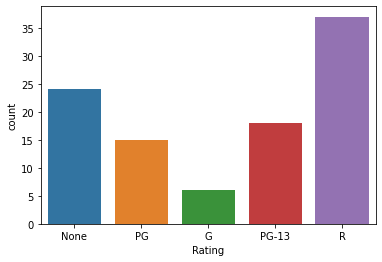

In [90]:
import seaborn as sns
sns.countplot(x = df.Rating)

In [114]:
df.Rating.value_counts()

R        37
None     24
PG-13    18
PG       15
G         6
Name: Rating, dtype: int64

Converting dataframe object to CSV

In [121]:
df.to_csv(r'D:\Data Sets\file.csv', index=False)